In [1]:
import os

os.chdir("..")

In [2]:
from datasetsforecast.m3 import M3
from utilsforecast.plotting import plot_series
import pandas as pd
from models.NBeatsStackMoe import NBeatsStackMoe
from models.NBeatsMoeLags import NBeatsMoeLags
from neuralforecast import NeuralForecast
from utils import load_dataset, train_test_split
from models.callbacks.probs_collector import GateValuesCollectorCallback
from neuralforecast.losses.numpy import smape
from neuralforecast.models import NBEATS
from neuralforecast.tsdataset import TimeSeriesDataset
import matplotlib.pyplot as plt
from datasets.load_data.gluonts_dataset import GluontsDataset
from models.hyper import config
import numpy as np

# Load the M3 dataset
# m3 = M3.load(directory='C:\\Users\\ricar\\mixture_of_experts_time_series\\data\\m3\\', group='Monthly')[0]
m1, horizon, n_lags, freq_str, freq_int = GluontsDataset.load_everything("m1_monthly")

m1['y'] = m1['y'].astype(float)

# m4['ds'] = pd.to_datetime(m4['ds']).astype(int)

c:\Users\ricar\mixture_of_experts_time_series\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-06-11 19:04:30,790	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-06-11 19:04:30,991	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
c:\Users\ricar\mixture_of_experts_time_series\venv\Lib\site-packages\gluonts\json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(
INFO:root:using dataset already processed in path C:\Users\ricar\.gluonts\datasets\m1_monthly.


In [3]:
horizon = horizon
input_size = n_lags

In [4]:
def calculate_smape(Y_test_df, Y_hat_df, forecast_col):
    """Calculate the sMAPE."""
    y_true = Y_test_df['y'].values
    try:
        y_hat = Y_hat_df[forecast_col].values
    except Exception as exc:
        y_hat = Y_hat_df
   
    n_series = Y_test_df['unique_id'].nunique()
    try:
        y_true = y_true.reshape(n_series, -1)
        y_hat = y_hat.reshape(n_series, -1)
    except Exception as e:
        raise ValueError("Error reshaping arrays") from e

    return smape(y_true, y_hat)

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 43.8 K | train
4 | gate         | Sequential    | 63     | train
5 | gate_act     | Softmax       | 0      | train
-------------------------------------------------------
43.5 K    Trainable params
340       Non-trainable params
43

Epoch 49: 100%|██████████| 20/20 [00:00<00:00, 35.21it/s, v_num=1853, train_loss_step=94.80, train_loss_epoch=1.2e+3, valid_loss=1.79e+3]    

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 49: 100%|██████████| 20/20 [00:00<00:00, 35.21it/s, v_num=1853, train_loss_step=94.80, train_loss_epoch=1.2e+3, valid_loss=1.79e+3]


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
340       Non-trainable params
2.4 M     Total params
9.648     Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


Epoch 49: 100%|██████████| 20/20 [00:00<00:00, 35.27it/s, v_num=1854, train_loss_step=98.40, train_loss_epoch=949.0, valid_loss=2.12e+3]    

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 49: 100%|██████████| 20/20 [00:00<00:00, 35.24it/s, v_num=1854, train_loss_step=98.40, train_loss_epoch=949.0, valid_loss=2.12e+3]


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 20/20 [00:00<00:00, 199.58it/s]
all_gates_cat shape: torch.Size([617, 3])

mean inputs_cat:  tensor([0.3352, 0.2787, 0.3861], device='cuda:0')

num_experts: tensor([ 74,  48, 132], device='cuda:0')

Best expert counts: tensor([188, 139, 290], device='cuda:0')

Number of times gate values are +5% bigger than the mean (per expert): tensor([54, 57, 39], device='cuda:0')

Difference to mean: tensor([9.5155e-09, 1.1206e-08, 1.1206e-08], device='cuda:0')


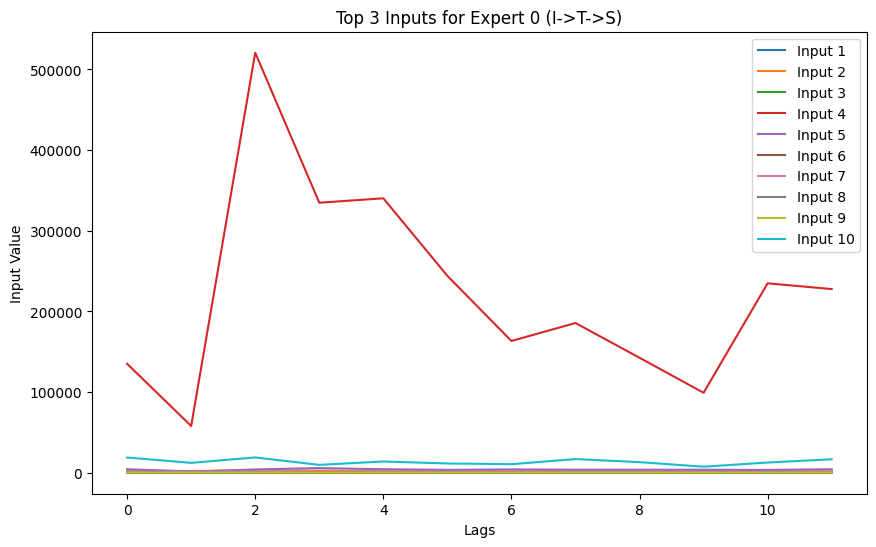

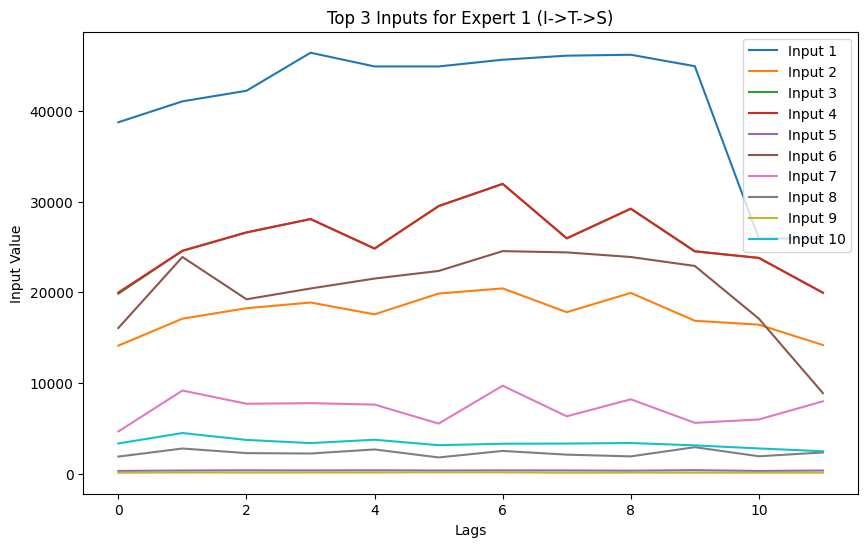

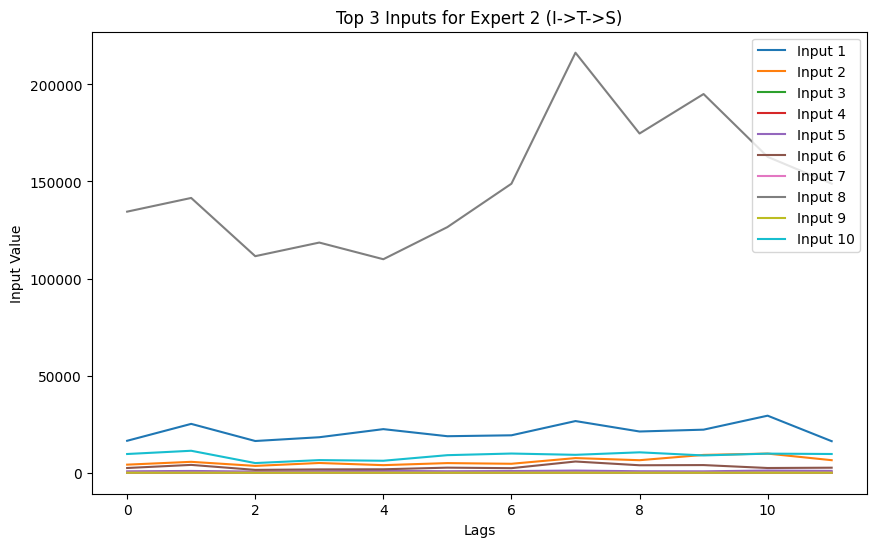

Resetting gate values for next epoch.
Predicting DataLoader 0: 100%|██████████| 20/20 [00:00<00:00, 26.06it/s] 

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting DataLoader 0: 100%|██████████| 20/20 [00:00<00:00, 170.77it/s]


In [5]:
y_train, y_test = train_test_split(m1, horizon)
# config['gluonts']['m1_monthly']['NBeatsStackMoe']['n_blocks'] = [1,1,1]
# config['gluonts']['m1_monthly']['NBEATS']['n_blocks'] = [1,1,1]


prob_collector = GateValuesCollectorCallback(is_stack=True, reset_on_epoch=True)
nf = NeuralForecast(
    models=[
        NBeatsStackMoe( 
            h=horizon,
            input_size=input_size,
            callbacks=prob_collector,
            # **config['gluonts']['m1_monthly']['NBeatsStackMoe'],
        ),
        NBEATS(
            h=horizon,
            input_size=input_size,
            # **config['gluonts']['m1_monthly']['NBEATS'],
        ),
    ], 
    freq='M',
)
nf.fit(df=y_train, static_df=None, val_size=horizon)
predictions = nf.predict(futr_df=y_test)

# smape_stack= calculate_smape(y_test, predictions, 'NBeatsStackMoe')
# print(f'sMAPE for stack: {smape_stack}')
# smape_nbeats= calculate_smape(y_test, predictions, 'NBEATS')
# print(f'sMAPE for NBEATS: {smape_nbeats}')

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 20/20 [00:00<00:00, 169.95it/s]
all_gates_cat shape: torch.Size([617, 3])

mean inputs_cat:  tensor([0.3352, 0.2787, 0.3861], device='cuda:0')

num_experts: tensor([ 74,  48, 132], device='cuda:0')

Best expert counts: tensor([188, 139, 290], device='cuda:0')

Number of times gate values are +5% bigger than the mean (per expert): tensor([54, 57, 39], device='cuda:0')

Difference to mean: tensor([9.5155e-09, 1.1206e-08, 1.1206e-08], device='cuda:0')


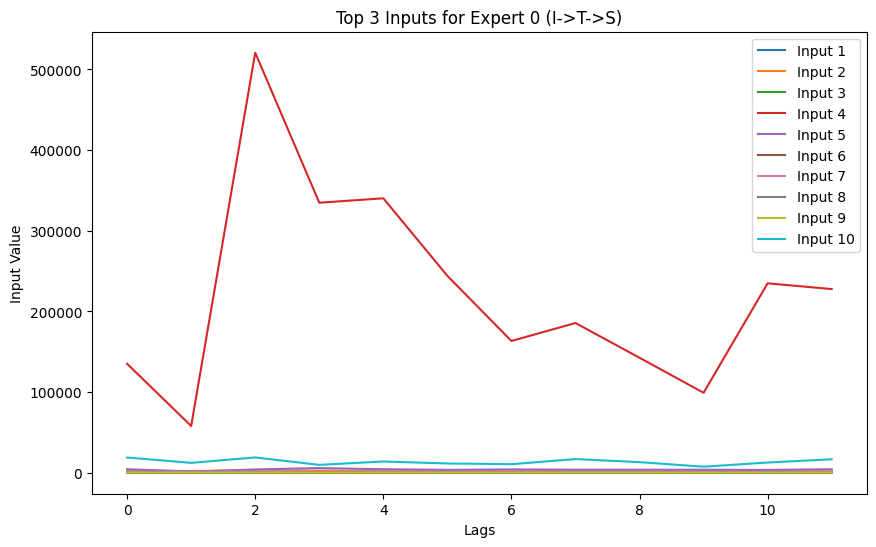

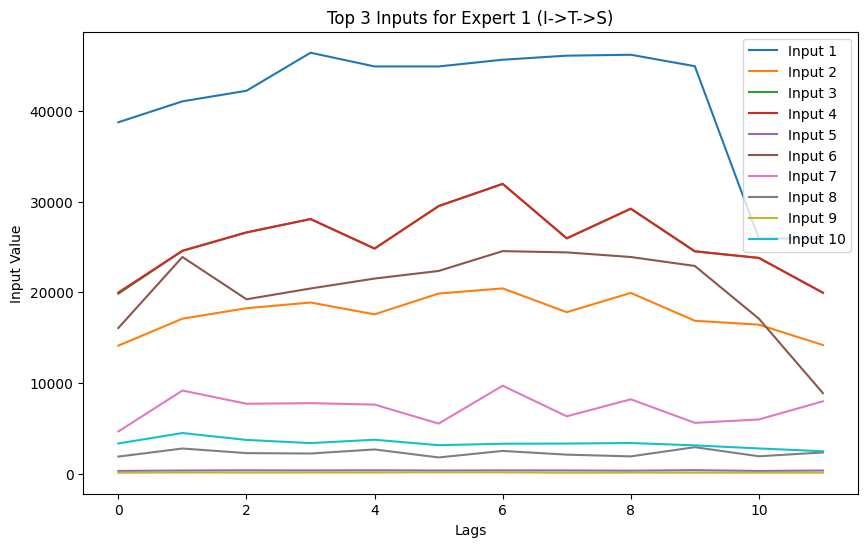

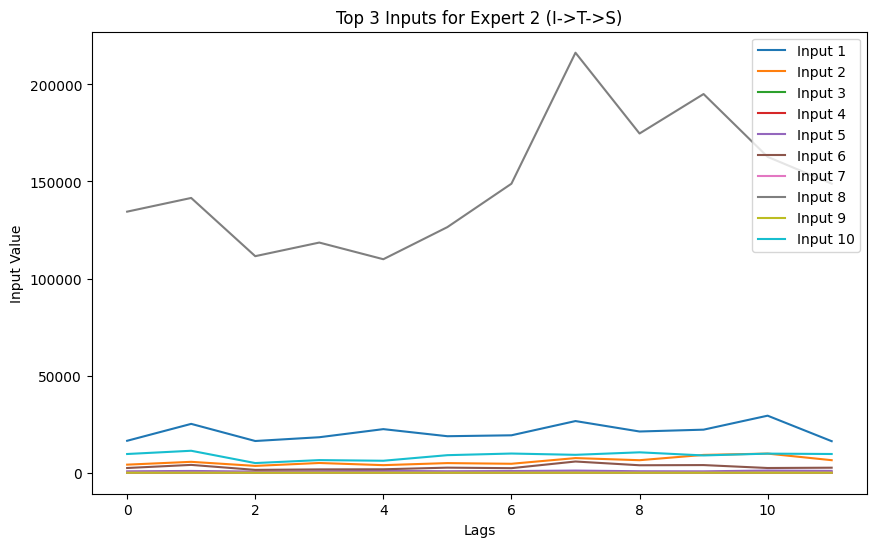

Resetting gate values for next epoch.
Predicting DataLoader 0: 100%|██████████| 20/20 [00:00<00:00, 24.46it/s] 

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting DataLoader 0: 100%|██████████| 20/20 [00:00<00:00, 200.19it/s]


In [6]:
y_hats = []

for i, model in enumerate(nf.models):
    dataset, *_ = TimeSeriesDataset.from_df(df = y_train)
    y_hat = model.decompose(dataset=dataset)

    y_hats.append(y_hat)

In [7]:
gate_values = nf.models[0].all_gate_logits
print(len(gate_values))


0


In [11]:
import matplotlib
matplotlib.use("pgf")

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",  # or "xelatex"
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False,
})

# Define your IDs and models
to_check_ids = [1, 121, 241, 282] # 241, 242 282
to_check_ids = [str(i) if str(i).startswith('ID') else f'ID{str(i)}' for i in to_check_ids]
enumerate_models = ['N-BEATS-MOE', 'N-BEATS']
unique_ids = y_test['unique_id'].unique().tolist()
# to_check_ids = y_test['unique_id'].unique().tolist()

gate_values = np.load('gate_values_stack0_epoch_0.npy', allow_pickle=True)

# Setup combined figure
n_ids = len(to_check_ids)
n_models = 1 #len(enumerate_models)
fig, ax = plt.subplots(4, n_ids * n_models, figsize=(4 * n_ids, 10), sharex='row')
fig.subplots_adjust(hspace=0.3, wspace=0.2)



for i, id in enumerate(to_check_ids):
    m_id = y_test[y_test['unique_id'] == id]
    m_idex = unique_ids.index(id)

    print(f"Gate values for {id}: {gate_values[m_idex]}")

    for j, model_name in enumerate(enumerate_models):
        y_hat = y_hats[j]
        col_idx = i * n_models + j  # Place plots in proper subplot column

        linestyle = '--' if model_name == 'N-BEATS' else '-'  # Dashed for NBEATS


        if i == 0 and j == 0:
            ax[0, i].plot(m_id['y'].values, label='True', linewidth=2)
            ax[0, i].plot(y_hat[m_idex].sum(axis=0).flatten(), label=model_name, color="#7B3841", linestyle=linestyle)
            ax[0, i].legend(fontsize=10)
            ax[0, i].set_title(f'{to_check_ids[i]}', fontsize=16)
            ax[0, i].set_ylabel('Signal', fontsize=14)

            ax[1, i].plot(y_hat[m_idex, 0] + y_hat[m_idex, 1], color="green", linestyle=linestyle)
            ax[1, i].set_ylabel('Identity', fontsize=14)

            ax[2, i].plot(y_hat[m_idex, 2], color="orange", linestyle=linestyle)
            ax[2, i].set_ylabel('Trend', fontsize=14)

            ax[3, i].plot(y_hat[m_idex, 3], color="blue", linestyle=linestyle)
            ax[3, i].set_ylabel('Seasonality', fontsize=14)
            ax[3, i].set_xlabel(r'$\tau \in \{t+1,..., t+H\}$', loc='center', fontsize=14)
        else:
            if j == 0: 
                ax[0, i].plot(m_id['y'].values, linewidth=2)
            if i == 0:
                print(model_name)
                ax[0, i].plot(y_hat[m_idex].sum(axis=0).flatten(), label=model_name, color="#7B3841", linestyle=linestyle)
                ax[0, i].legend(fontsize=10)
            else:
                ax[0, i].plot(y_hat[m_idex].sum(axis=0).flatten(), color="#7B3841", linestyle=linestyle)
            ax[0, i].set_title(f'{to_check_ids[i]}', fontsize=16)

            ax[1, i].plot(y_hat[m_idex, 0] + y_hat[m_idex, 1], color="green", linestyle=linestyle)

            ax[2, i].plot(y_hat[m_idex, 2], color="orange", linestyle=linestyle)

            ax[3, i].plot(y_hat[m_idex, 3], color="blue", linestyle=linestyle)

        smape_value = calculate_smape(m_id, y_hat[m_idex].sum(axis=0).flatten(), model_name)
        print(f'sMAPE for {id} - {model_name}: {smape_value}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('./pgfs/combined_forecast_decomposition.pgf', bbox_inches='tight')
plt.show()


Gate values for ID1: [0.27494758 0.16929956 0.5557529 ]
sMAPE for ID1 - N-BEATS-MOE: 0.026832856722759785
N-BEATS
sMAPE for ID1 - N-BEATS: 0.07341137672043192
Gate values for ID121: [0.3192099  0.2511627  0.42962745]
sMAPE for ID121 - N-BEATS-MOE: 0.033141926571374186
sMAPE for ID121 - N-BEATS: 0.08034737023692205
Gate values for ID241: [0.195799  0.1933358 0.6108652]
sMAPE for ID241 - N-BEATS-MOE: 0.043965480711460156
sMAPE for ID241 - N-BEATS: 0.10260167563701392
Gate values for ID282: [0.36562967 0.2321267  0.40224358]
sMAPE for ID282 - N-BEATS-MOE: 0.10152819970031292
sMAPE for ID282 - N-BEATS: 0.2285707376660323
